In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DXG Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/22/2024,"19,850.0","19,600.0","20,000.0","19,300.0",30.55M,1.79%
1,03/21/2024,"19,500.0","18,950.0","19,550.0","18,650.0",38.13M,4.00%
2,03/20/2024,"18,750.0","18,600.0","18,800.0","18,350.0",12.37M,1.35%
3,03/19/2024,"18,500.0","19,200.0","19,300.0","18,500.0",11.64M,-2.63%
4,03/18/2024,"19,000.0","18,450.0","19,300.0","18,200.0",36.19M,3.83%


In [4]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,13401.4,"13,310.6","13,401.4","13,189.6",9.86M,2.78%
2018-01-03,13371.1,"13,401.4","13,522.4","13,159.4",7.43M,-0.23%
2018-01-04,13522.4,"13,431.6","13,824.9","13,401.4",8.92M,1.13%
2018-01-05,13159.4,"13,310.6","13,522.4","13,098.8",13.87M,-2.68%
2018-01-08,14066.9,"13,189.6","14,066.9","13,038.3",8.78M,6.90%


In [7]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.16651213],
       [0.16575483],
       [0.1695363 ],
       ...,
       [0.3001907 ],
       [0.31893559],
       [0.32768321]])

In [9]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [10]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [11]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [12]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate mean absolute error
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

Train MAE: 436.2127209274855
Test MAE: 417.12775704898684


In [13]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [14]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [15]:
future_predict

array([[19862.43963641],
       [19856.99256294],
       [20033.94484862],
       [20047.4345733 ],
       [19917.73962106],
       [20039.77474243],
       [20127.29864688],
       [19911.31347401],
       [20010.55141015],
       [19965.76350138],
       [20042.17781124],
       [19981.66263114],
       [19931.55956586],
       [19818.70562886],
       [19956.97831393],
       [20184.44522344],
       [20291.38289457],
       [20295.63374928],
       [20160.52889717],
       [20298.74756314],
       [20344.984559  ],
       [20262.1947431 ],
       [20317.45623976],
       [20228.1523584 ],
       [20245.57382996],
       [20386.75695965],
       [20308.54367177],
       [20290.75271065],
       [20300.50217497],
       [20351.58743463],
       [20221.04018952],
       [20022.10729624],
       [20002.43849814],
       [19907.29386285],
       [19818.39312831],
       [19969.28383377],
       [19898.6903697 ],
       [19786.2796955 ],
       [19868.7196265 ],
       [19769.42619368],


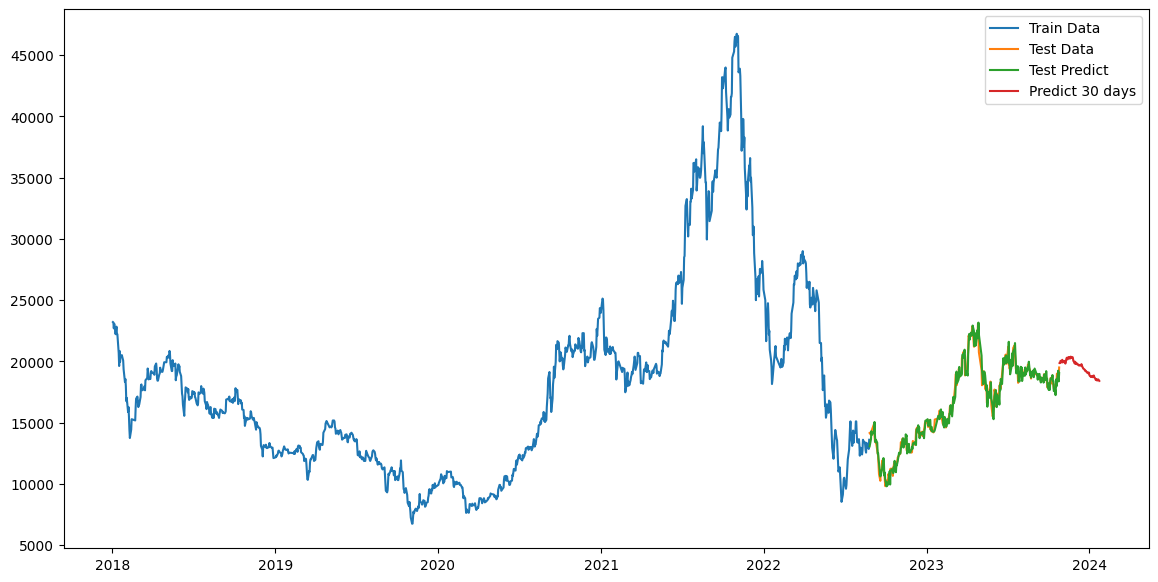

In [16]:
# Calculate the start and end dates for the future predictions
start_date = df.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=89)  # 30 days including start_date
predict_dates = pd.date_range(start=start_date, end=end_date)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90)
plt.plot(future_predict_dates, future_predict, label='Predict 30 days')


# Display the legend
plt.legend()

# Display the plot
plt.show()